## Actividad Práctica: Explorando Patrones Ocultos en Datos Reales
### Tema: Reducción de dimensionalidad + Clustering no supervisado

**Objetivo:**
Aplicar técnicas de reducción de dimensionalidad y clustering para explorar, visualizar y descubrir patrones ocultos en un conjunto de datos realista.

*Dataset:* Spotify Tracks Dataset (https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db)

(Contiene características musicales como energy, danceability, acousticness, tempo, valence, etc.)


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

### 1. Exploración Inicial de Datos (EDA)

- Inspeccionar columnas: ¿cuáles son numéricas y útiles para clustering?
- Normalizar/estandarizar las variables numéricas.
- **OPCIONAL** Usar mapas de correlación para eliminar variables redundantes.

In [2]:
spotify_tracks = pd.read_csv('C:/Users/THINKBOOK/Documents/1. ESTUDIOS y FORMACIONES/PROGRAMMING/Data Science/Desarrollos de las clases/Clase 16 - Aprendizaje No Supervisado/SpotifyFeatures.csv')
spotify_tracks.head() #Explorando primeras 5 filas

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
#Explorando dimension del dataset
print(f"Dataset shape:{spotify_tracks.shape}")

Dataset shape:(232725, 18)


#### Explorando informacion de las columnas ¿cuáles son numéricas y útiles para clustering?

In [4]:
spotify_tracks.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

A partir de la inspección anterior, observamos que en el dataset hay *11 columnas númericas*, las cuales son: 
- popularity
- acousticness
- danceability
- duration_ms
- energy
- instrumentalness
- liveness
- loudness
- speechiness
- tempo
- valence  

*Seleccion solo de las columnas númericas*

In [5]:
X = spotify_tracks.select_dtypes(include = ['number'])
X

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0.61100,0.389,99373,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814
1,1,0.24600,0.590,137373,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816
2,3,0.95200,0.663,170267,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368
3,0,0.70300,0.240,152427,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227
4,4,0.95000,0.331,82625,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...
232720,39,0.00384,0.687,326240,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962
232721,38,0.03290,0.785,282447,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969
232722,47,0.90100,0.517,166960,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813
232723,44,0.26200,0.745,222442,0.704,0.000000,0.3330,-7.137,0.1460,100.031,0.489


*Excluir columnas no deseadas, como el target o identificadores (Para cuando las hayan)*

In [6]:
#X = spotify_tracks.drop(columns = ['target', 'id']) #Eliminar columnas no deseadas

#### Normalizacion/Estandarizacion de las variables numericas

In [7]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-2.26100656,  0.6833763 , -0.89093479, ..., -0.36796995,
         1.5956073 ,  1.38074423],
       [-2.20603102, -0.34546718,  0.19199369, ..., -0.18308213,
         1.82325339,  1.38843461],
       [-2.09607995,  1.6445698 ,  0.58529607, ..., -0.45583209,
        -0.5883258 , -0.33421214],
       ...,
       [ 0.32284371,  1.50081358, -0.20130869, ...,  0.14680516,
        -1.08520529,  1.37689903],
       [ 0.1579171 , -0.30036719,  1.02708778, ...,  0.13602453,
        -0.57075233,  0.13105629],
       [-0.33686274, -0.7646152 ,  1.09712793, ..., -0.49625945,
        -0.12199762,  0.09260435]])

#### Visualizar correlaciones entre las variables numericas (*Prueba de correlacion de Pearson*) y eliminacion de variables redundantes

Una variable es **redundante** si aporta **información muy similar** a otra(s).

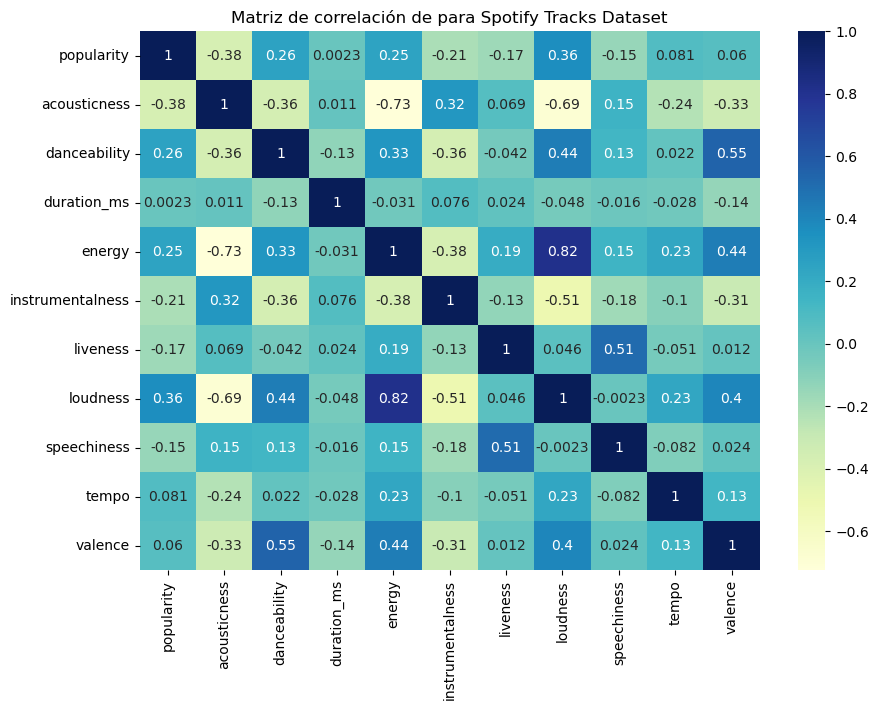

In [8]:
#Compute correlation matrix 
corr_matrix = spotify_tracks.corr(numeric_only = True)

#Plot correlation heatmap
plt.figure(figsize=(10, 7))  # Ancho: 12 pulgadas, Alto: 8 pulgadas
sns.heatmap(corr_matrix, cmap = "YlGnBu", annot = True, fmt = '.2g')
plt.title('Matriz de correlación de para Spotify Tracks Dataset')
plt.show()

**Buscar pares de variables con alta correlación**
- *Umbral típico:* **|correlación|** > **0.8 o 0.9**
- Si dos variables tienen correlación alta (positiva o negativa), probablemente estén codificando la misma información.

In [9]:
#Matriz absoluta sin la diagonal 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

In [10]:
#Buscar pares con correlación > 0.9
to_drop = [columns for column in upper.columns if any(upper[column].abs() > 0.85)]
print("Variables altamente correlacionadas a eliminar:", to_drop)

Variables altamente correlacionadas a eliminar: []


In [11]:
#Eliminar del dataframe columnas redundantes (altamente correlacionadas entre si)
spotify_tracks_reduced = spotify_tracks.drop(columns = to_drop)

### 2. Reducción de Dimensionalidad

- Aplicar PCA para reducir la dimensionalidad, visualizando varianza explicada.
- Aplicar t-SNE para explorar agrupamientos no lineales (diferente forma de visualizar).
- Graficar los resultados en 2D: ¿hay grupos naturales visibles?

#### Aplicación de PCA para reducir dimensionalidad

Exploramos de manera general a partir del siguiente grafico el **numero de componentes necesarias** para explicar cada **porcentaje de varianza**.

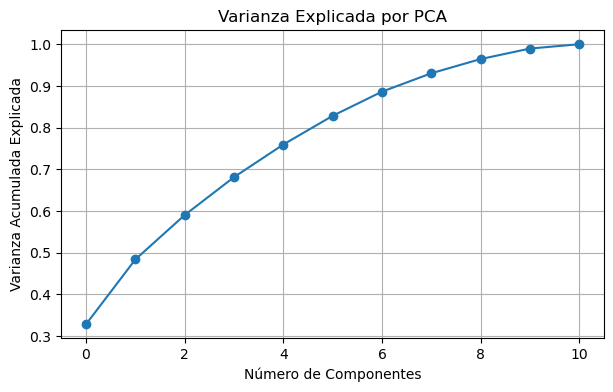

In [12]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Gráfico de varianza explicada
plt.figure(figsize=(7,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Explicada por PCA')
plt.grid(True)
plt.show()

Elegimos una varianza del 85% para realizar PCA.

In [13]:
pca = PCA(0.85) 
X_pca = pca.fit_transform(X_scaled)

print(f"Shape del dataset luego de la reduccion dimensional con PCA:{X_pca.shape}")

Shape del dataset luego de la reduccion dimensional con PCA:(232725, 7)


Dado que estamos usando PCA a partir de una varianza establecida obtendremos x numero de componentes principales que sklearn necesita para lograrlo. Para el caso anterior PCA determinó que para conservar el **85% de la varianza**, se necesitan **7 componentes principales**. Observamos de manera numerica y gráfica el aporte de cada componente a la varianza:

In [14]:
#Explicacion de la varianza por componentes principales
pca.explained_variance_ratio_

array([0.3282235 , 0.15545747, 0.10647707, 0.09089407, 0.07833839,
       0.06879605, 0.05798688])

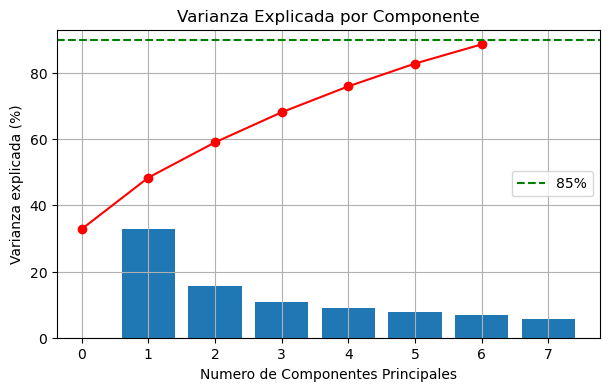

In [15]:
#Visualización varianza explicada por cada componente
explained_var = pca.explained_variance_ratio_

plt.figure(figsize = (7,4))
plt.bar(range(1, len(explained_var) + 1), explained_var * 100)
plt.plot(np.cumsum(explained_var) * 100, marker = 'o', color = 'red')
plt.xlabel('Numero de Componentes Principales')
plt.ylabel('Varianza explicada (%)')
plt.title('Varianza Explicada por Componente')
plt.axhline(y=90, color='green', linestyle='--', label='85%')
plt.legend()
plt.grid(True)
plt.show()

A partir de lo anterior podemos explicar cuanto aportan las primeras dos componentes  32,82% y 15,54%, respectivamente, siendo las que mas aportan en comparación a las demás componentes.

*Observar distribución en el espacio PCA los datos de las 2 primeras componentes principales*

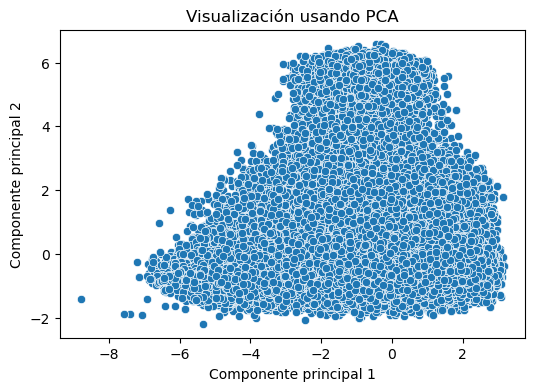

In [16]:
#Visualizacion 2D - distribucion de las primeras dos componentes (PC 1 y PC 2)
plt.figure(figsize = (6,4))
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1])
plt.title('Visualización usando PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

Del gráfico anterior *no observamos grupos naturalmente visibles*, lo cual puede ser debido a que no estamos ilustrando la información de la distribución de todas las componentes principales que aportan en el espacio PCA, que en este caso son 7.

#### Aplicar t-SNE para explorar agrupamientos no lineales

Dado que este dataset es grande, podemos usar una muestra del mismo, solo para aplicar t-SNE y visualizar.

In [ ]:
tsne = TSNE(n_components = 2, perplexity = 100, method='barnes_hut', random_state=42)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize = (6,4))
sns.scatterplot(x = X_tsne[:,0], y = X_tsne[:,1])
plt.title('Visualizacion t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

### 3. Clustering No Supervisado

Agrupar instancias similares **sin usar etiquetas**, y explorar qué representan esos grupos.

- Aplicar clustering (con KMeans o con DBSCAN) sobre los datos reducidos con PCA.
- Visualizar los clusters en 2D con color.
- Etiquetar los clusters con algún nombre provisional

#### KMeans

#### Elegir el número óptimo de clusters (K) en KMeans: Método del codo
Empleamos primero el metodo del codo para encontrar el *punto donde la mejora en la inercia comienza a ser marginal*, es decir, donde la curva forma un "codo". Ese valor de K es el número óptimo de clusters.

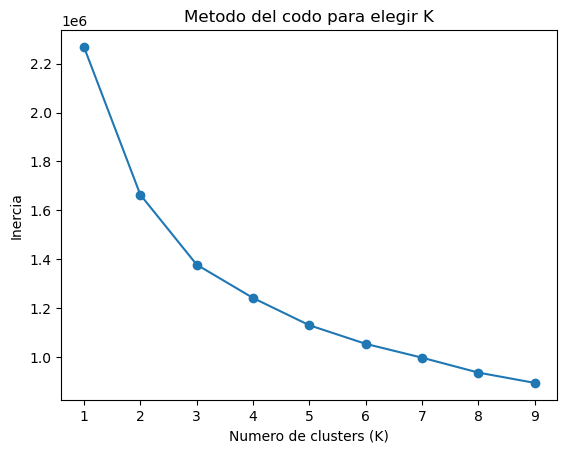

In [76]:
inertias = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(X_pca)
    inertias.append(km.inertia_)

plt.plot(k_range, inertias, marker = 'o')
plt.title("Metodo del codo para elegir K")
plt.xlabel("Numero de clusters (K)")
plt.ylabel("Inercia")
plt.show()

En la gráfica anterior se observa que la curva comienza a mostrar un cambio notable en **x = 3**, lo que teóricamente indicaría que este sería el número óptimo de *clusters*. Sin embargo, dado que en la realidad existen **27 grupos musicales diferentes**, no resulta adecuado tomar este valor. En lugar de agrupar estrictamente por géneros individuales, para este caso se optará por identificar **familias musicales**, dentro de las cuales puedan coexistir varios géneros relacionados.

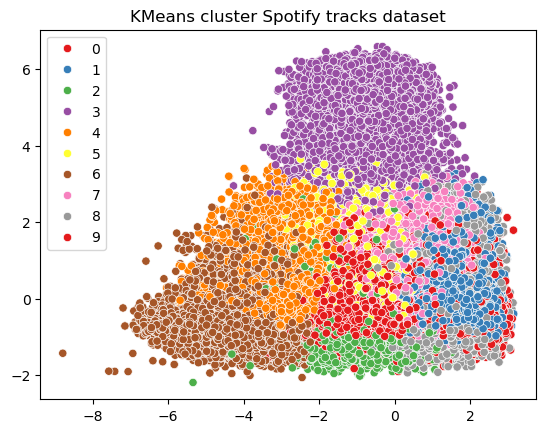

In [34]:
kmeans = KMeans(n_clusters = 10, random_state = 42)
labels_kmeans = kmeans.fit_predict(X_pca)

#Visualizar clusters en 2D
fig, ax = plt.subplots()
plt.title("KMeans cluster Spotify tracks dataset")
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue = labels_kmeans, palette = 'Set1', ax = ax)

#Cambiar etiquetas manualmente 
#handles, _ = ax.get_legend_handles_labels()
#ax.legend(handles = handles, labels = ["Grupo 1", "Grupo 2", "Grupo 3"], title = "Grupos")

plt.show()

En este ejemplo, al aplicar el algoritmo **KMeans**, se logra visualizar efectivamente los 10 grupos formados. Sin embargo, la gráfica puede resultar confusa, ya que se observan numerosos puntos de un clúster inmersos dentro de otro. Esta aparente superposición se debe principalmente a la limitación de la representación en un plano bidimensional, mientras que la verdadera distribución de los datos está explicada por seis dimensiones. Para contrastar y evaluar si es posible obtener una segmentación más clara o con mejor cohesión, se implementó el algoritmo **DBSCAN**, con el fin de comparar los resultados frente a los obtenidos con KMeans.

#### DBSCAN

#### Estimar el parámetro eps en DBSCAN: Gráfico de k-distancia
Empleamos la grafica de k-distancia para evidenciar la *distancia al k-ésimo vecino más cercano para cada punto*, con el objetivo de estimar el valor adecuado de eps para DBSCAN.

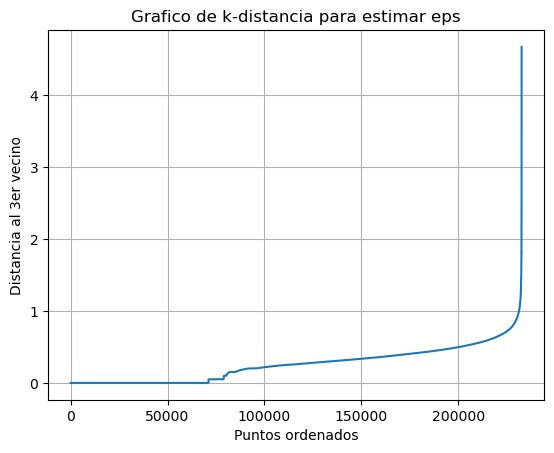

In [37]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors = 3) #calcular distancias a los 3 vecinos mas cercanos para cada punto (valor obtenido del metodo del codo)
neighbors_fit = neighbors.fit(X_pca)          #ajustar neighbors al dataset X_pca
distances, indices = neighbors_fit.kneighbors(X_pca) #calcular indices y distancias para cada vecino mas cercano
distances = np.sort(distances[:,1]) #Extraer la distancia al 2ndo vecino mas cercano (punto clave en DBSCAN)
                                    #Ordenar las distancias de menor a mayor → esto genera la curva de k-distancia

plt.plot(distances)
plt.title('Grafico de k-distancia para estimar eps')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 3er vecino')
plt.grid()
plt.show()

Observamos en la grafica anterior que la curva empieza a hacerse notoria en aproximadamente x = 0.8, por tanto este sería nuestro numero óptimo para *eps*.

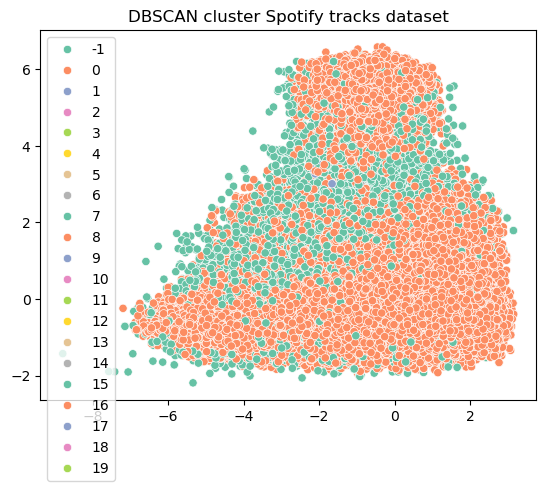

In [38]:
dbscan = DBSCAN(eps = 0.8, min_samples = 10)
labels_dbscan = dbscan.fit_predict(X_pca)

#Visualizar clusters en 2D
fig, ax = plt.subplots()
plt.title("DBSCAN cluster Spotify tracks dataset")
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue = labels_dbscan, palette = 'Set2', ax = ax)
plt.show()

Se observa que **DBSCAN** identifica más de 19 grupos, un valor que se aproxima al número real de géneros musicales. No obstante, en el plano bidimensional no se logra una diferenciación clara entre ellos, lo cual se explica por la limitación de la visualización en dos dimensiones, ya que la distribución real de los datos está definida en seis dimensiones.

En este sentido, si el objetivo es realizar agrupaciones individuales por géneros musicales específicos, **DBSCAN** puede ser una alternativa adecuada. En cambio, si se busca construir **familias musicales** en las que puedan coexistir varios géneros relacionados, resulta más apropiado utilizar KMeans. Para este caso particular se optará por trabajar con KMeans, con el fin de generar familias musicales y analizar de esta forma los patrones presentes en el dataset.

### 4. Interpretación y Evaluación

Validar si los clusters tienen sentido, y qué representan en términos reales.

- Calcular métricas como Silhouette Score (-1: mal agrupado)  o  +1 :excelente agrupamiento) para ver que tan bien estan armados los clusters.
- Analizar características promedio por cluster. (En este punto será necesario unir los resultados de la reduccion de dimensionalidad con los datos originales para hacer el análisis basado en las columnas iniciales) --> Esta union se puede realizar con un merge, los datos originales y los datos despues de la reducción de dimensionalidad conservan el orden, y pueden unirse por el indice.
- Usar la columna género para determinar ¿Qué género predomina en cada cluster? ¿Estos generos son movidos, energéticos, pasivos?

#### Calculo de metricas para evaluar agrupamientos de los clusters

#### Coeficiente de Silueta (Silhouette Score)
Usaremos **Silhouette Score** para medir que tan bien separado esta un punto de su cluster comparado con otros clusters.

- **Cerca de 1:** Los puntos estan bien agrupados. *(buena agrupación)*
- **Cerca de 0:** Muchos puntos estan entre dos clusters.
- **Negativo:** Muchos puntos probablemente estan mal asignados. *(mala grupación)*

*Nota:* Evaluo nada mas una parte del dataset para acelerar el calculo, dado que al tener muchos datos y dimensiones el proceso resulta ser lento.

In [39]:
from sklearn.metrics import silhouette_score

score_kmeans = silhouette_score(X_pca, labels_kmeans, sample_size = 50000, random_state = 42)
print(f"Silhouette Score KMeans:{score_kmeans:.2f}")

Silhouette Score KMeans:0.17


El *silhouette score* obtenido con el agrupamiento fue de **0.17**, lo que a primera vista podría interpretarse como una segmentación deficiente y alejada de una correcta separación de los grupos y patrones presentes en el dataset. Sin embargo, no debemos basar la evaluación únicamente en esta métrica. Si bien el valor cercano a 0 indica que **muchos puntos se encuentran en la frontera entre dos clusters** y que la cohesión podría mejorar, el *silhouette score* solo mide qué tan compactos y separados están los clusters entre sí.

Por lo tanto, para un análisis más adecuado es necesario ajustar el número de clusters en función del objetivo final. En este caso, por ejemplo, se puede optar por **10 clusters** para conformar *familias musicales* o por **27 clusters** para realizar una *comparación directa con los géneros musicales conocidos del dataset*.

#### Analizar características promedio por cluster

In [40]:
#Crear un nuevo dataframe con los clusters
X_clusters = pd.DataFrame({'cluster':labels_kmeans})

#Unir con datos originales
X_combined = pd.concat([spotify_tracks, X_clusters], axis = 1)

#Verificar union
X_combined

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,8
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,1
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,5
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,4
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962,2
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,1
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813,5
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489,0


In [41]:
#Seleccionar columnas númericas útiles
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

#Promedio de caracteristicas por cluster
cluster_means = X_combined.groupby('cluster')[features].mean().round(2)
df_cluster = pd.DataFrame(cluster_means)
df_cluster

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
cluster,,,,,,,,,
0,0.18,0.73,0.65,0.01,0.16,-6.72,0.13,115.12,0.56
1,0.16,0.69,0.75,0.02,0.19,-6.34,0.08,112.64,0.76
2,0.24,0.56,0.63,0.78,0.18,-9.47,0.06,121.28,0.44
3,0.79,0.56,0.67,0.00,0.74,-11.92,0.87,97.95,0.41
4,0.91,0.32,0.17,0.06,0.22,-18.03,0.06,102.17,0.19
5,0.66,0.67,0.39,0.08,0.18,-12.03,0.10,121.01,0.71
6,0.87,0.28,0.15,0.85,0.14,-21.40,0.04,101.76,0.14
7,0.10,0.51,0.76,0.03,0.29,-5.83,0.09,102.35,0.37
8,0.11,0.49,0.77,0.03,0.23,-5.69,0.11,162.08,0.49


- **Cluster 0, 1, 7 y 8:** presentan alto *danceability, energy* y *tempo*, junto con bajos niveles de *acousticness, speechiness* e *instrumentalness*. Se caracterizan por ser **enérgicos y bailables**, con predominancia de sonidos sintéticos.

*Posibles géneros:* EDM, pop, reguetón, dance pop, hip hop comercial.

- **Cluster 2:** muestra alto *energy* e *instrumentalness, danceability* medio, además de bajo *acousticness* y *speechiness* cercano a 0. Se caracteriza por ser **enérgico y bailable**, con predominancia de sonidos generados por instrumentos reales.

*Posibles géneros:* rock, hard rock, punk, alternative rock.

- **Cluster 3:** presenta alto *acousticness, energy, liveness* y *speechiness*, pero bajo instrumentalness. Se caracteriza por ser **enérgico**, con predominancia de voces y sonidos en vivo.

*Posibles géneros:* rap, hip hop, freestyle, spoken word, podcasts.

- **Cluster 4:** se caracteriza por alto *acousticness*, bajo *instrumentalness* y *speechiness* cercano a 0. Es un grupo **pasivo, calmado e introspectivo**, con predominancia de sonidos acústicos.

*Posibles géneros:* folk, baladas acústicas, indie acústico, soundtracks.

- **Cluster 5 y 9:** tienen alto *acousticness* y *danceability*. Se caracterizan por ser **bailables**, aunque con predominancia de sonidos acústicos.

*Posibles géneros:* flamenco pop, música latina acústica, salsa suave, bossanova, folk bailable.

- **Cluster 6:** presenta alto *acousticness e instrumentalness*, junto con bajo *energy* y *danceability*. Se caracteriza por ser **calmado e introspectivo**, con predominancia tanto de sonidos acústicos como sintéticos.

*Posibles géneros:* música ambiental, new age, clásica contemporánea, chill-out instrumental.

Podemos explorar también a partir de una gráfica de cajas y bigotes la distribución de una caracteristica en especifico para cada cluster:

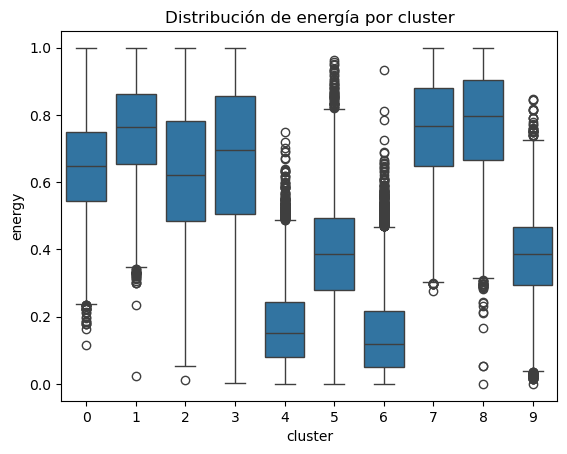

In [42]:
#¿Qué tan energéticas son en promedio las canciones en cada cluster?
sns.boxplot(data=X_combined, x='cluster', y='energy')
plt.title("Distribución de energía por cluster")
plt.show()

La anterior gráfica nos permite hacer afirmaciones para varios cluster:
- *Clusters 0, 1, 7, 8:* La mayoria de sus canciones tienden a ser muy energéticas, como lo habiamos mencionado previamente. Con excepcion de algunas que no (datos atipicos).
- *Cluster 4, 5, 6, 9:* La mayoria de sus canciones tienden a ser muy poco enérgeticas, con execepcion de varias que están por encima del punto maximo (datos atipicos).
- *Cluster 2 y 3:* El grueso de sus canciones tienden a ser muy energeticas también, sin embargo contiene canciones que pueden no serlo.

#### Generos que predominan en cada cluster

In [44]:
#Conteo de generos por cluster
genre_counts = X_combined.groupby(['cluster','genre']).size().reset_index(name='count')
print(f"Conteo de generos por cluster\n {genre_counts}")

#Obtener el género más frecuente por cluster
genre_counts.groupby('cluster')['count'].idxmax() #busca por id el genero con mayor frecuencia por cluster
top_genres = genre_counts.loc[genre_counts.groupby('cluster')['count'].idxmax()] #localiza por id el genero con mayor frecuencia por cluster
print(f"Genero mas frecuente por cluster\n {top_genres}")

Conteo de generos por cluster
      cluster             genre  count
0          0       Alternative   1501
1          0             Anime     15
2          0             Blues    230
3          0  Children's Music      1
4          0  Children’s Music   1946
..       ...               ...    ...
251        9              Rock   1587
252        9               Ska     94
253        9              Soul   2833
254        9        Soundtrack    218
255        9             World   1775

[256 rows x 3 columns]
Genero mas frecuente por cluster
      cluster             genre  count
11         0           Hip-Hop   5953
45         1         Reggaeton   4687
60         2        Electronic   3243
82         3            Comedy   9060
117        4             Opera   5900
130        5  Children's Music   3844
174        6        Soundtrack   7404
176        7       Alternative   2735
225        8               Ska   2774
240        9              Folk   4026


De la anterior data, podemos observar que para los 10 clusters los géneros que mas predominan son y los podemos clasificar como:

|Cluster|Genero          |Count|Clasificación actividad|
|-------|----------------|----|------------------------|
|0      |Hip-Hop         |5953|energético|
|1      |Reggaeton       |4687|energético|
|2      |Electronic      |3243|energético|
|3      |Comedy          |9060|energético|
|4      |Opera           |5900|pasivo|
|5      |Children's Music|3844|energético||
|6      |Soundtrack      |7404|pasivo|
|7      |Alternative     |2735|pasivo|
|8      |Ska             |2774|pasivo|
|9      |Folk            |4026|pasivo|

### Conclusión

Las tecnicas como el análisis de componentes principales (PCA) y t-SNE (t-distributed Stochastic Neighbor Embedding) como herramientas de reducción dimensional son fundamentales al momento de captar la estructura subyacente de un dataset y minimizar el ruido del mismo, lo que facilita un procesamiento más eficiente y una visualización más clara. En particular, t-SNE permite proyectar datos de alta dimensión en un espacio bidimensional optimizando la representación visual de la distribución de los mismos.  No obstante, posee limitantes computacionales significativas para datasets extensos como este. Para reducir el  tiempo de ejecución de este método es posible utilizar variantes optimizadas como *barnes-hut* o aplicar previamente una reducción mediante PCA, disminuyendo así la dimensionalidad antes de ejecutar t-SNE.

En cuanto a los algoritmos de clusterización, se observó que tanto **KMeans** como **DBSCAN** permitieron realizar la agrupación con resultados relativamente satisfactorios. Con **KMeans** se optó por construir manualmente *familias musicales* a partir de los géneros originales del dataset, agrupando uno o varios géneros dentro de cada clúster. Por su parte, **DBSCAN** arrojó un número de clústeres cercano al total de géneros presentes originalmente en los datos.

La principal limitación encontrada radica en la **visualización:** al representar los clústeres en un plano bidimensional, se pierde información, dado que la distribución real está explicada por **seis dimensiones**. Por ello, es esperable que la separación entre clústeres no se aprecie de la manera más clara en las gráficas.

En cuanto a las métricas, el *Silhouette Score* no mostró un resultado destacado para la clusterización realizada con KMeans. Sin embargo, no siempre debe interpretarse este valor como un indicador absoluto de calidad, ya que esta métrica únicamente evalúa el grado de compactación y separación entre clústeres. En este caso, el ajuste del número de clústeres debe realizarse en función del **objetivo final** del análisis, como se hizo al definir familias musicales o al comparar con géneros conocidos.

Finalmente, al comparar el género más frecuente en cada clúster con los géneros propuestos a partir del análisis de las características promedio de cada grupo, se observa una alta correspondencia. Esto confirma que el análisis realizado fue consistente y preciso, logrando identificar patrones musicales que se alinean con la distribución real de los géneros en el dataset.

En conclusión, si bien la clusterización fue funcional y permitió extraer información relevante, aún existen oportunidades de mejora tanto en la optimización de parámetros de los algoritmos como en la calidad de la representación de los datos.
